In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hist_contour as hc

plt.rcParams.update({"font.size": 15})

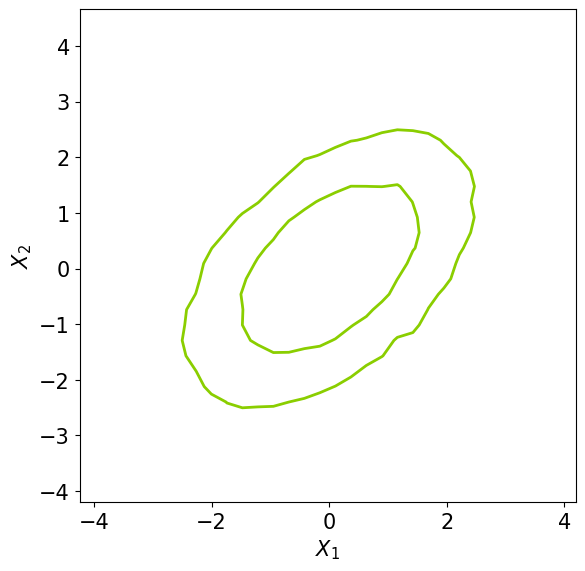

In [2]:
# plot some draws from a multivariate normal
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", colour="#8ACE00")
plt.show()

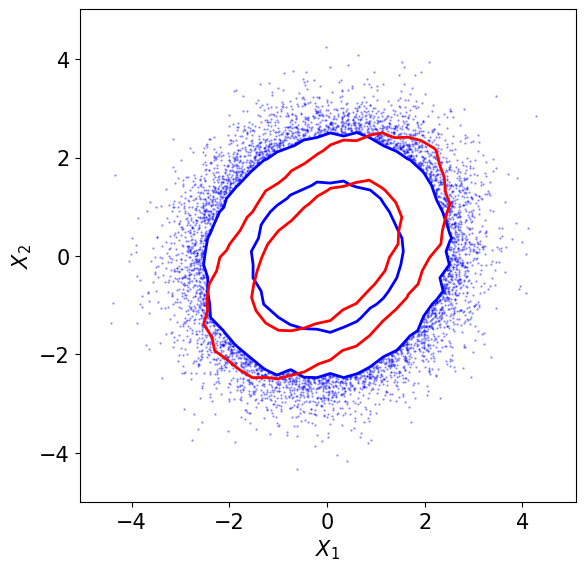

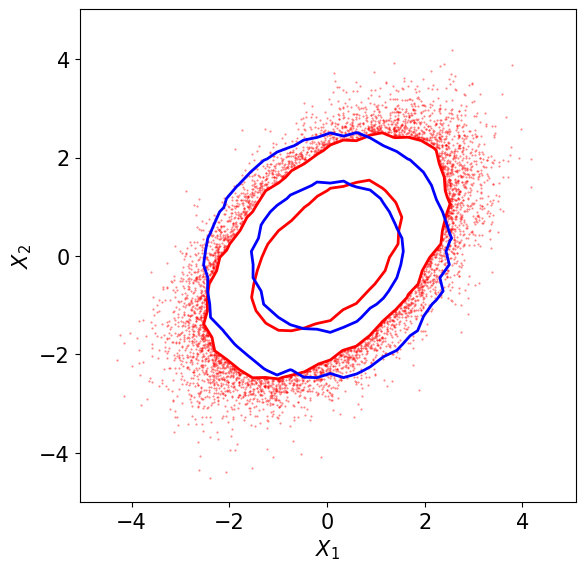

In [3]:
# a more complicated double layered example, with outliers
X1 = np.random.multivariate_normal([0, 0], [[1, 0.1], [0.1, 1]], 100000)
X2 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

# we'll plot the outliers for X1, and just the contours for X2
ax = hc.hist_contour(X1[:,0], X1[:,1], xlabel="$X_1$", ylabel="$X_2$", show_outliers=True, colour="blue")
hc.hist_contour(X2[:,0], X2[:,1], xlabel="$X_1$", ylabel="$X_2$", ax=ax, colour="red")
# adjust the axis limits based on the extent of the contours
hc.centre_axis_on_contours(ax, 0.5)
plt.show()

# now we can try the other way around
ax = hc.hist_contour(X2[:,0], X2[:,1], xlabel="$X_1$", ylabel="$X_2$", show_outliers=True, colour="red")
hc.hist_contour(X1[:,0], X1[:,1], xlabel="$X_1$", ylabel="$X_2$", ax=ax, colour="blue")
# adjust the axis limits based on the extent of the contours
hc.centre_axis_on_contours(ax, 0.5)
plt.show()

/Users/stephenthorp/Documents/hist_contour/hist_contour.py:255: UserWarning: linewidths is ignored by contourf
  ax.contourf(x_grid, y_grid, z, levels=l, colors=fill_colours,


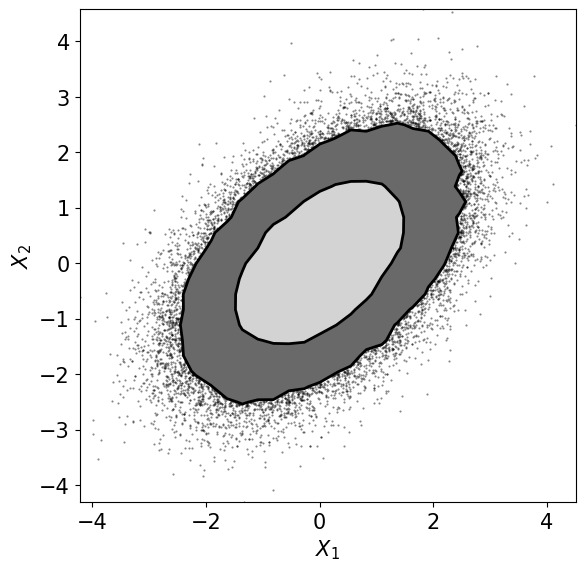

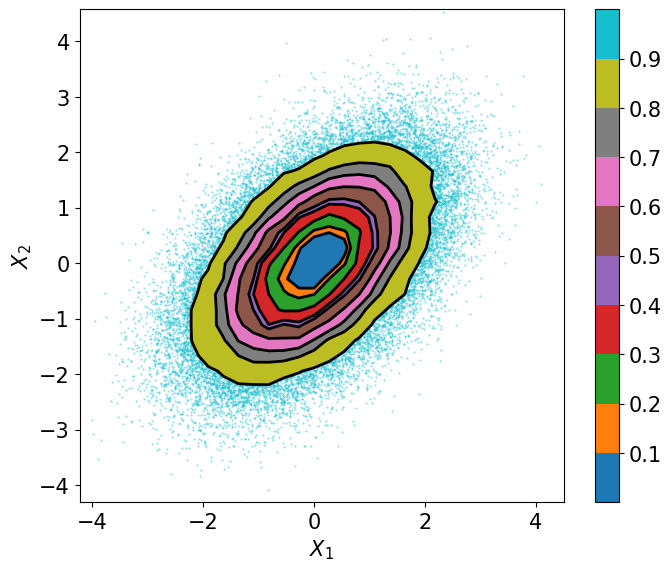

In [4]:
# another example with contour levels shaded based on a list of colours or colourmap
# list of colours, with outliers shown
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", shading=["dimgray", "lightgray"], show_outliers=True)
plt.show()

# levels every 10% with a discrete colour map
ax = hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", levels=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], shading="tab10", show_outliers=True, figsize=(8, 6.4))
ax.set_aspect("equal")
plt.show()